In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import config_style_plot as style
from __future__ import division
from coord import GGS
from equiv_layer import EqLayer
from map_plot import grid_map
from normal_grav import Norm_Grav

style.plot_params()

In [2]:
# Loading data
prefix = '../data/ICGEM/Guanabara_'
spacing = '0.1'
sufix = 'deg.gdf'
lon, lat, data = np.loadtxt('{}{}{}'.format(prefix,spacing,sufix), skiprows=34, unpack=True)
# data

In [3]:
# Transforming into kilometers
float(spacing)*111

11.100000000000001

In [4]:
# Calculating normal gravity
alt = np.zeros_like(lon)+3000.
gamma = Norm_Grav().closedform(alt, lat)
# gamma

In [5]:
# Calculating disturbance
disturb = data-gamma
# disturb

In [6]:
# grid_map(lon, lat, alt, disturb, 'Guanabara Bay', edges=(-43.85,-42.8,-23.25,-22.5), center=(-22.8, -22.4,-43.), drawlines=(0.2,0.1), lim_val=(True,30.), fig_size=(7.,8.), sign=(-43.8,-43.8,-22.8,-23.1))#, save=name)

In [7]:
# Calculating Cartesian coordinates
x, y, z = GGS().geodetic2cartesian(lon, lat, alt)
R = np.array(GGS().rotation_matrix(lon, lat))

In [8]:
pc = []
hc = []
indc = []
xc = []
yc = []
zc = []
Rc = []
rabs_max = []
taur = 1e-11 #1e-5 #0.05
tauc = 1e-3
it_max_l1 = 5

In [9]:
latc = []
lonc = []

In [10]:
indl = np.arange(disturb.size)
mi_c = 1e-30
hcl = 2000. #14200. # 20000. #800. #1000.
print hcl, type(indl), #indl

2000.0 <type 'numpy.ndarray'>


In [11]:
rcl = disturb[indl]
xcl = x[indl]
ycl = y[indl]
zcl = z[indl]

latcl = lat[indl]
loncl = lon[indl]

In [12]:
Rcl = R[:, indl]

In [13]:
# Calculo de Acc_l
hlay = np.zeros(indl.size) - hcl
xlay, ylay, zlay = GGS().geodetic2cartesian(hlay, latcl, loncl)
Lay = EqLayer(lon, lat, np.zeros_like(lon)-hcl)

In [14]:
layer = Lay.build_layer(xlay, ylay, zlay)
Acc_l = Lay.designMat(xcl, ycl, zcl, Rcl, layer)
print Acc_l.shape

(56, 56)


In [15]:
H = np.dot(Acc_l.T, Acc_l)
# H += mi_c*np.trace(H)*np.identity(indl.size)
H += (mi_c*np.trace(H)*np.identity(indl.size))/indl.size

In [16]:
H.shape

(56, 56)

In [17]:
p_L2 = np.linalg.solve(H, np.dot(Acc_l.T, rcl))
print p_L2.size

56


In [18]:
rcl -= np.dot(Acc_l, p_L2)
# print rcl[:50]

In [19]:
rabs_max_l = np.max(np.abs(rcl))
rabs_max_l

50.074391085072421

In [20]:
pc.append(p_L2)
hc.append(hcl)
indc.append(indl)
xc.append(xcl)
yc.append(ycl)
zc.append(zcl)
Rc.append(Rcl)

In [21]:
latc.append(latcl)
lonc.append(loncl)

In [22]:
rabs_max.append(rabs_max_l)

In [23]:
rc = rcl[:] #r1

In [24]:
print np.max(np.abs(rc))

50.0743910851


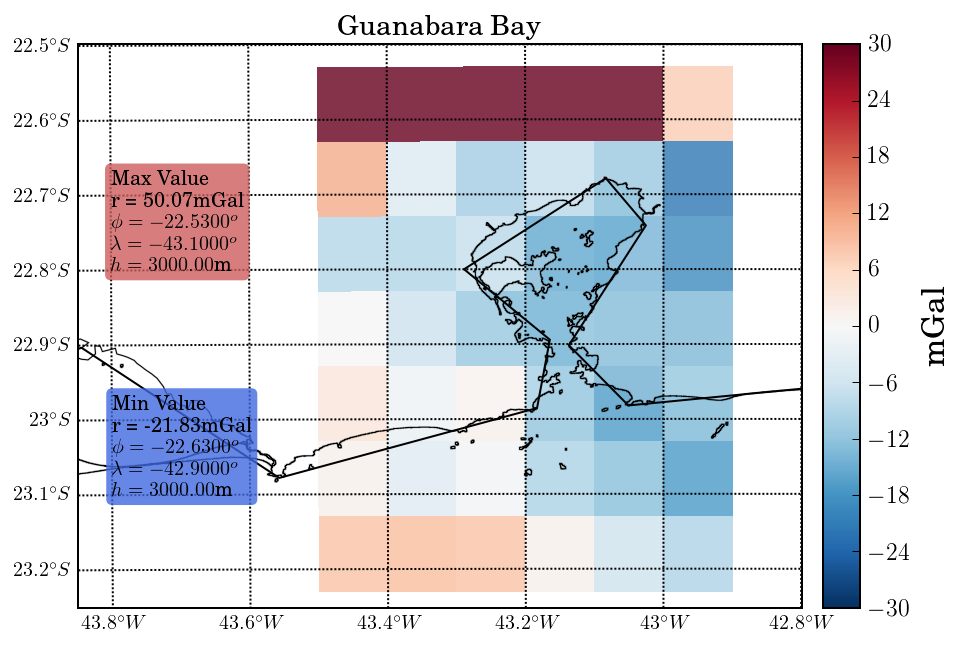

In [25]:
# Residual
grid_map(lon, lat, alt, rc, 'Guanabara Bay', edges=(-43.85,-42.8,-23.25,-22.5), center=(-22.8, -22.4,-43.), drawlines=(0.2,0.1), residual=True, lim_val=(True,30.), fig_size=(7.,8.), sign=(-43.8,-43.8,-22.8,-23.1))#, save=name)

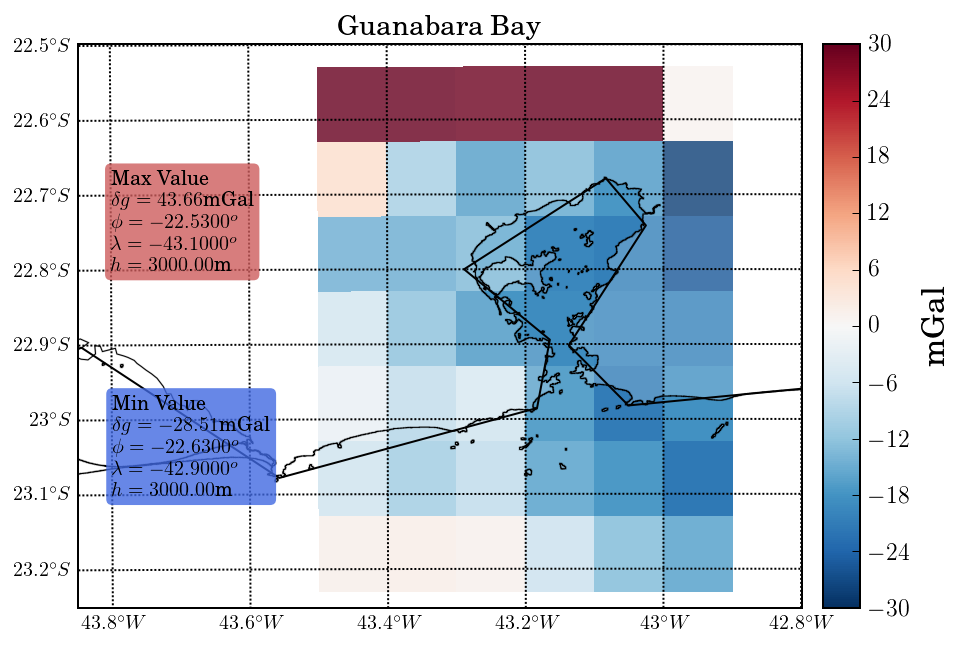

In [26]:
# Residual
grid_map(lon, lat, alt, disturb, 'Guanabara Bay', edges=(-43.85,-42.8,-23.25,-22.5), center=(-22.8, -22.4,-43.), drawlines=(0.2,0.1), lim_val=(True,30.), fig_size=(7.,8.), sign=(-43.8,-43.8,-22.8,-23.1))#, save=name)

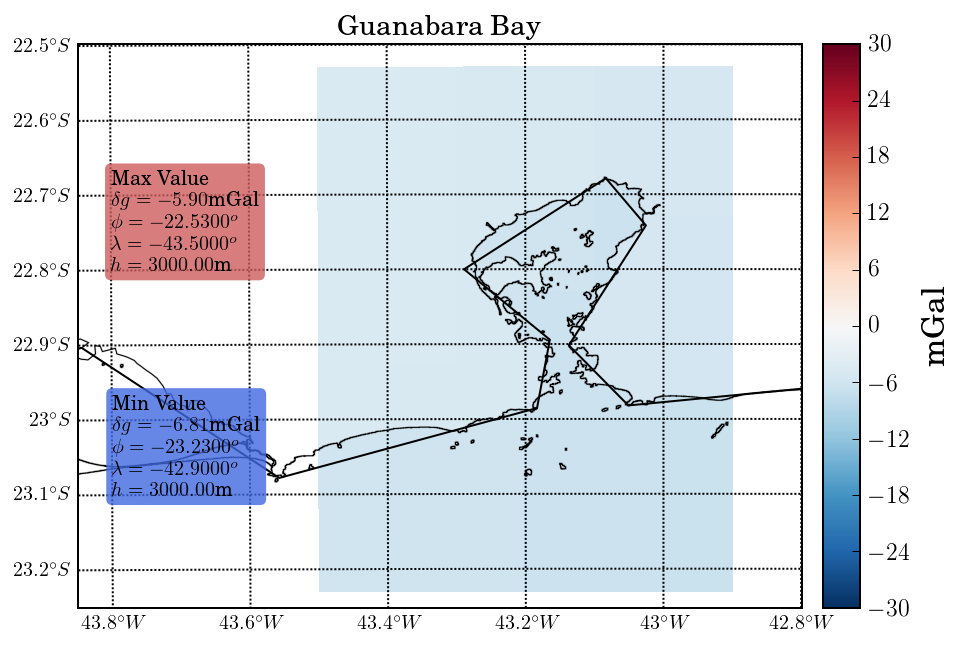

In [27]:
# Residual
grid_map(lon, lat, alt, np.dot(Acc_l, p_L2), 'Guanabara Bay', edges=(-43.85,-42.8,-23.25,-22.5), center=(-22.8, -22.4,-43.), drawlines=(0.2,0.1), lim_val=(True,30.), fig_size=(7.,8.), sign=(-43.8,-43.8,-22.8,-23.1))#, save=name)

In [28]:
20.83+139.89+65.15

225.86999999999998